## Limitations of Random Forests


Random Forests are an incredibly powerful Machine Learning tool for application on structured data, especially in their ability to predict non-linear relationships between features and the dependent variable in the given data

However they do have a limitation. That limitation is extrapolating to beyond the data set.

#### 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

 ##### 2. Create synthetic data

Create synthetic ordered data in the range between 0 and 1

In [10]:
x = np.linspace(0,1)[:,None] #converts a 1D array into a 2D array
x.shape

(50, 1)

###### Dependent variable

The dependent variable is the same independent variable with some noise

In [12]:
y = x + np.random.uniform(-0.2,0.2,x.shape) 
y.shape

(50, 1)

#### 3. Plot the values

Reveals a linear relationship as expected

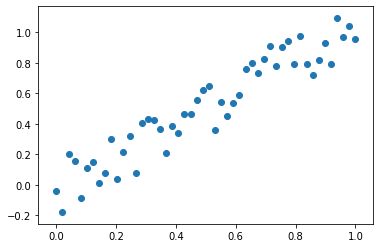

In [13]:
plt.scatter(x,y)

In [14]:
x_train,x_valid = x[:40],x[40:]
y_train,y_valid = y[:40],y[40:]

#### 4. Train a Random Forest 

In [15]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

c:\users\vishak~1\desktop\env\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\vishak~1\desktop\env\ml\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### 5. Plot the Random Forest predictions of the training data to the actual labels

As expected, the relation is roughly linear, as it should be with a well trained Random Forest

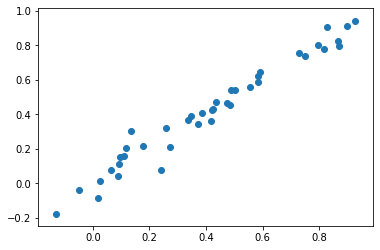

In [16]:
plt.scatter(rf.predict(x_train),y_train)

#### 6. Plot the validation predictions against the validation labels

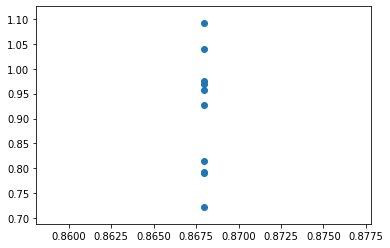

In [17]:
plt.scatter(rf.predict(x_valid),y_valid)

Wow! Why Does this happen?

This has to do with how random Forests work.

Random Forests split on points within the range of the training data. **but** our data has been structured such that all the values in the validation set are beyond the training set's max values.
This results in the entire validation data falling to one end of the split.

This cannot be remedied due to the nature of Random Forests.

#### Solution

The only workable solutions are 

1. Expand your training labels 
2. Remove any temporal/extrapolative aspects of your data (this might reduce your OOB score, but depending on your goal, it will increase your validation score)